# Kickstarter - Donate or Don't

Kickstarter is an American public benefit corporation based in Brooklyn, New York, that maintains a global crowdfunding platform focused on creativity. On this platform initiators can bring their ideas to a concrete project.

A lot of people contribute to these projects in form of donating money. These donators are called backers. Many of these backers support these projects out of interest in the related topic, or out of sympathy with the initiator. As a benefit for the support the backers, depending on the amount of money they contributed, receive a gift or the finished product itself.

Each project has a campaign time prior to the project itself that lasts up to 60 days. During this time the money needed to realize the project is collected. If not enough money is funded, the project is considered as not successful and none of the backers are charged. If the target amount is reached, the backers will be charged and the money is going to be transferred to the initiator, so he or she can start with the project itself.

A lot of backers ask themselves, if the project they're thinking of donating to is going to be successful. To contribute in an unsuccessful project doesn't mean to lose money, but it means to reserve money for a project, that can't be used for other purposes during the campaign time. It could be used for example for a project that has a better chance of being successful and is still looking for additional backers.

Given these thoughts, we had a closer look at the dataset at hand, providing the metadata for more than 200000 projects on kickstarter. We'll have a closer look at these observations in order to support backers in making a decision, if it is worth to donate or not. We'll also look for information that supports initiators to find out what  the criteria for a succesful project are.

## 01 - Business Understanding

As a first step, we'll have a closer look at the data given, and its meaning in consideration of the Kickstarter crowdfunding platform.

First we're going to initialize this notebook and load some packages that we're going to need during our project. In a second step we're going to import the dataset into this notebook and have a first look into it. Then we'll talk investigate the meaning for the delivered columns.

### Initializing

In [65]:
reset -fs

In [66]:
# Importing the most important modules and setting the style for following plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# For Data Mining
import os, glob

# For Data Cleaning
from datetime import datetime
import missingno as msno

# Importing the most important metrics and tools for the machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve, f1_score, fbeta_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score, confusion_matrix

#Preprocessing
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

# Importing the algorithms to be used
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Importing tools to tune Hyperparameters of the machine learning models
from sklearn.model_selection import GridSearchCV

# Setting the random seed for reproducability
RSEED = 42

### Importing Data

In [67]:
# Importing the dataset and first glance into the different available features
# Importing the several csv files and merging them into one dataframe

file_list = glob.glob(os.path.join("data", "*.csv"))
df_list = []
for file in file_list:
    df = pd.read_csv(file, sep=',')
    df['file'] = file.split('/')[-1]
    df_list.append(df)
df_raw = pd.concat(df_list, ignore_index=True, sort=True)

### First Look on the Data

In [4]:
# Show the first five rows inside the dataset

print(df_raw.shape)
pd.set_option('display.max_columns', None)
df_raw.head()

(209222, 38)


,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,file,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,USD,1552539775,False,Kickstarter040.csv,NaN,1.000000,28000.0,2108505034,NaN,False,NaN,1548223375,"{""id"":2462429,""name"":""Novato"",""slug"":""novato-c...",Babalus Children's Shoes,NaN,"{""key"":""assets/023/667/205/a565fde5382d6b53276...",28645.0,"{""id"":3508024,""project_id"":3508024,""state"":""in...",babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28645.000000,international
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,1504976459,False,Kickstarter040.csv,NaN,1.000000,1000.0,928751314,NaN,False,NaN,1502384459,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.0,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1950.000000,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,1371013395,False,Kickstarter040.csv,NaN,1.000000,15000.0,928014092,NaN,False,NaN,1368421395,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.0,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",22404.000000,international
3,3,The Mist of Tribunal is a turn-based card game...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",165,GB,1483780271,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",GBP,£,False,USD,1489425776,False,Kickstarter040.csv,NaN,1.308394,10000.0,596091328,NaN,False,NaN,1484245376,"{""id"":475457,""name"":""Kaunas"",""slug"":""kaunas-ka...",The Mist of Tribunal - A Card Game,NaN,"{""key"":""assets/015/091/198/216fbf1bdc3739e7971...",136.0,"{""id"":2825329,""project_id"":2825329,""state"":""in...",the-mist-of-tribunal-a-card-game,https://www.kickstarter.com/discover/categorie...,False,False,failed,1489425776,1.216066,"{""web"":{""project"":""https://www.kickstarter.com...",165.384934,domestic
4,3,"Livng with a brain impairment, what its like t...","{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",2820,US,1354817071,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",USD,$,True,USD,1357763527,False,Kickstarter040.csv,NaN,1.000000,2800.0,998516049,NaN,False,NaN,1355171527,"{""id"":2507703,""name"":""Traverse City"",""slug"":""t...",Help change the face of Brain Impairment,NaN,"{""key"":""assets/011/457/844/37ba63d35fefaba76e9...",2820.0,"{""id"":417385,""project_id"":417385,""state"":""inac...",help-change-the-face-of-brain-impairment,https://www.kickstarter.com/discover/categorie...,True,False,successful,1357763527,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2820.00000

In [10]:
# Show all columns inside the dataset

for i in df_raw.columns:
    print(i)

backers_count
blurb
category
converted_pledged_amount
country
created_at
creator
currency
currency_symbol
currency_trailing_code
current_currency
deadline
disable_communication
file
friends
fx_rate
goal
id
is_backing
is_starrable
is_starred
launched_at
location
name
permissions
photo
pledged
profile
slug
source_url
spotlight
staff_pick
state
state_changed_at
static_usd_rate
urls
usd_pledged
usd_type


### Data Description
We're having a closer look at the meaning of the columns found in this dataset.

**backers_count**
How many people contributed with money to the project

**blurb**
A short description of a book, film, or other product written for promotional purposes

**category**
Category the project falls in

**converted_pledged_amount**
Amount of USD colleceted til deadline . converted from 'pledged' with 'static_usd_rate'

**country**
Country of origin of the project

**created_at**
Date when the project was created (UNIX Format)

**creator**
Creator data

**currency**
Currency of the project

**currency_symbol**
Symbol of the currency

**currency_trailing_code**
Determines if the country code is shown after the amount

**current_currency**
Same as currency

**deadline**
Deadline of the project

**disable_communication**
Communication with backer is disabled

**file**
Corresponding data file (csv)

**friends**
Friends at kickstarter

**fx_rate**
Conversion rate, but not allways for conversion to USD

**goal**
Amount of money requested for the project in local currency

**id**
Unique project id

**is_backing**
True if the projectowner also backs into other projects

**is_starrable**
Project meets criteria for being starred

**is_starred**
Project is starred

**launched_at**
Launching time of the project

**location**
Location of the project

**name**
Project name

**permissions**
Permissions for usage of other content

**photo**
Dictionary linked to a link with the project picture

**pledged**
Unconverted pleadged amount

**profile**
Profile data

**slug**
Keyword for the project, selected by the creator of the project

**source_url**
URL

**spotlight**
Project spotlighted on kickstarter (means state = successful)

**staff_pick**
Recomended by kickstarter staff. (old feature)

**state**
State if the project was succesfull in the end

**state_unchanged_at**
Duration of time passed by, after last change

**static_usd_rate**
Conversion rate into USD, from original currency

**urls**
URLs

**usd_pledged**
Pledged amount of USD realised at the deadline, converted from "pledged" via "static_usd_rate"

**usd_type**
NaN where "current currency" is not USD

## 02 - Data Mining

Usually as part of the data science life cycle, also other sources than the original dataset should be considered for the data exploration and building predictive models. This kind of research takes usually place during the data mining. In this case we're using only the dataset given without additional sources. We're going to skip this step and continue with the data cleaning.

## 03 - Data Cleaning

In this part we're having a closer look at the data and see if values are missing. We'll also see, if all data is necessary for our predictions and if so, if there are  outliers, that we should remove in order to get a better data consistency.

### Overview missing values

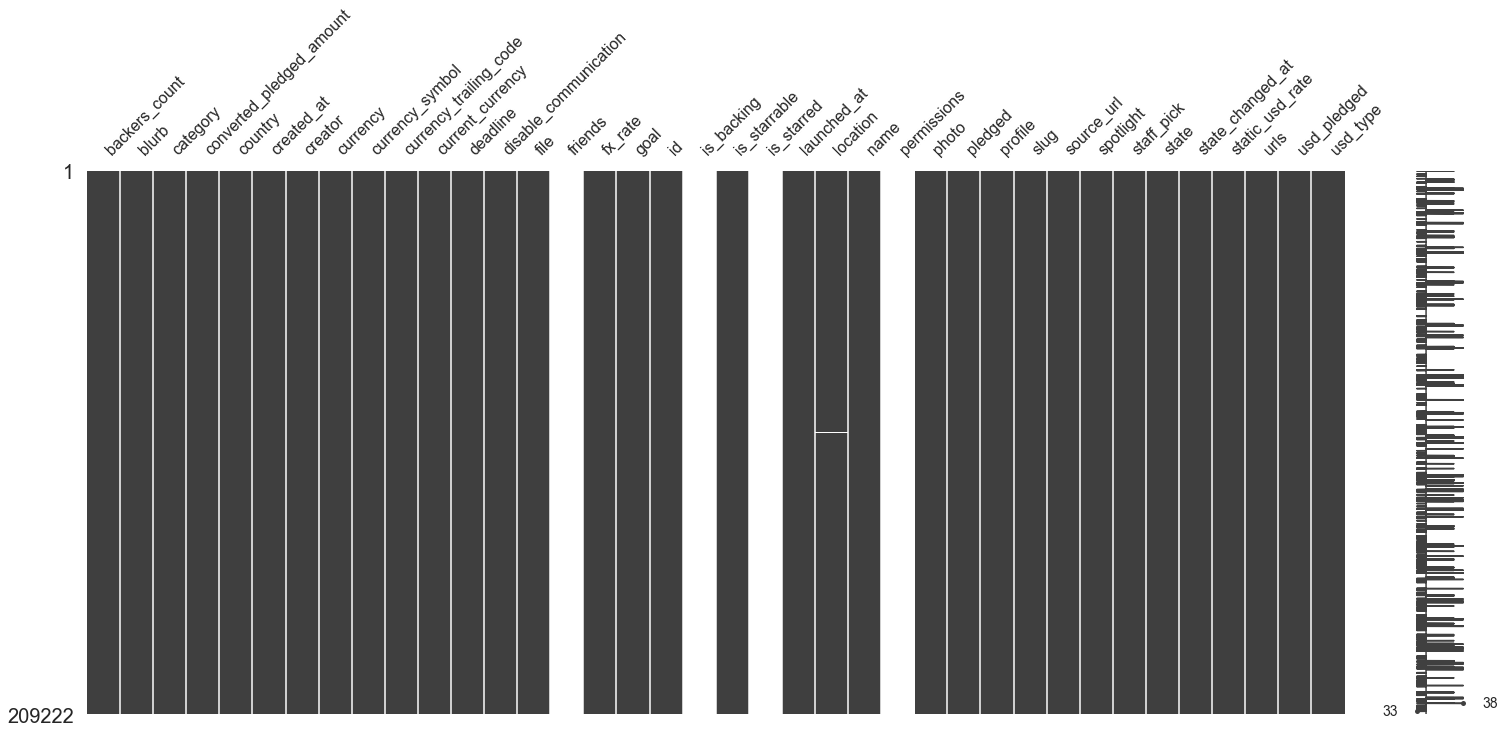

In [13]:
# Creating missing data map

msno.matrix(df_raw);

In [5]:
#Overview of missing values in numbers

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  file                      209222 non-null  o

In [18]:
# Check for NaN values

missing = pd.DataFrame(df_raw.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df_raw.shape[0]*100,1)
missing[missing.Number!=0]

,Number,Percentage
blurb,8,0.0
friends,208922,99.9
is_backing,208922,99.9
is_starred,208922,99.9
location,226,0.1
permissions,208922,99.9
usd_type,480,0.2


As we can see, in the following categories data is missing:

- blurb
- friends
- is_backing
- is_starred
- location
- permissions
- usd_type

### Relevant data for our exploration

After a closer look at the data, we decided to remove several columns from the dataset as they do not seem relevant for the rest of the data exploration.

We assumpt, that things like the url of the project do not influence, wether the campaign is going to be successful or not.

We're also to removing columns like 'is_starred' or 'friends', since there are not enough entries available. We can't fix this missing data with only 300 entries provided.

Keeping these thoughts in mind, we created the following list of relevant features:

- id (before we check for duplicates)
- backers_count
- usd_pledged
- source_url to grab the main category
- country
- goal needs to be converted to USD with static_usd_rate
- deadline and launched_at to create a new variable (campaign_days)
- disable_communication

In [68]:
# Creating a new dataframe with only relevant features and our label

df_reduced = df_raw[["state", "id", "backers_count", "usd_pledged",
                     "source_url", "country", "disable_communication"]].copy()

In [7]:
df_reduced.head()

,state,id,backers_count,usd_pledged,source_url,country,disable_communication
0,live,2108505034,315,28645.000000,https://www.kickstarter.com/discover/categorie...,US,False
1,successful,928751314,47,1950.000000,https://www.kickstarter.com/discover/categorie...,US,False
2,successful,928014092,271,22404.000000,https://www.kickstarter.com/discover/categorie...,US,False
3,failed,596091328,3,165.384934,https://www.kickstarter.com/discover/categorie...,GB,False
4,successful,998516049,3,2820.000000,https://www.kickstarter.com/discover/categorie...,US,False


### Checking for entries with same id

To make sure that every observation appears only once in our model, we search for duplicate entries and keep only those with the highest value in the column usd_pledged.

In [22]:
# checking for unique ids

print(df_reduced.shape)
print(df_reduced.id.nunique())

(209222, 7)
182264


There are a lot of duplicate IDs. To simplify the dataset, we will only keep those with the highest amount pledged in the column usd_pledged. Afterwards the column id will be dropped.

In [69]:
df_reduced.sort_values(["usd_pledged"], ascending=True, inplace = True)
df_reduced.drop_duplicates(subset="id" ,keep="last", inplace=True)
df_reduced.drop(columns = ["id"], inplace = True)
print(df_reduced.shape)

(182264, 6)


### Converting url to category

In [70]:
# creating the column main_category by stripping the values from the source_url and dropping source_url afterwards
df_reduced["main_category"] = [df_reduced.source_url[i].split("/")[5] for i in df_reduced.index]
df_reduced["main_category"] = df_reduced["main_category"].str.replace("%20", "_")
df_reduced.drop(columns = ["source_url"], inplace = True)
df_reduced.main_category.unique()

array(['music', 'journalism', 'publishing', 'art', 'technology',
       'fashion', 'food', 'film_&_video', 'crafts', 'theater', 'design',
       'photography', 'games', 'dance', 'comics'], dtype=object)

### Converting usd_pledged to int

In [71]:
df_reduced["usd_pledged"] = df_reduced["usd_pledged"].astype(int)

In [68]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182264 entries, 104610 to 168630
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   state           182264 non-null  object
 1   backers_count   182264 non-null  int64 
 2   usd_pledged     182264 non-null  int64 
 3   country         182264 non-null  object
 4   main_category   182264 non-null  object
 5   campaign_days   182264 non-null  int64 
 6   goal_converted  182264 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 16.1+ MB


## 04 - Data Exploration

In [39]:
df_reduced.skew()

backers_count            46.616179
usd_pledged              39.771371
disable_communication    17.016662
dtype: float64

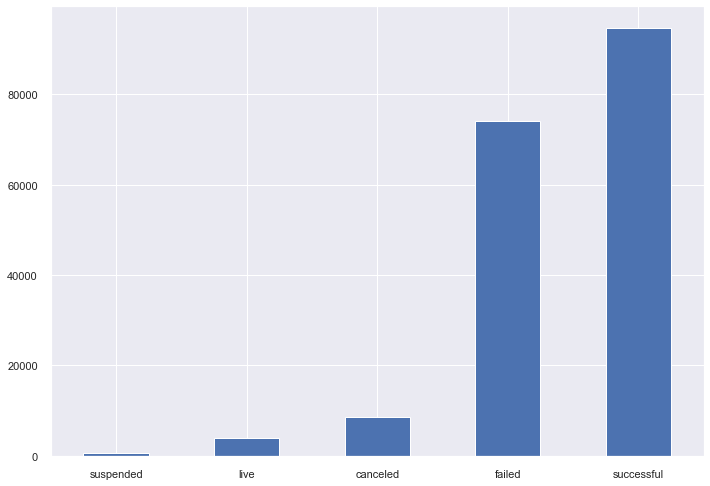

In [43]:
# Plot total number of projects by "state"
df_reduced['state'].value_counts(ascending=True).plot(kind='bar', rot=0);

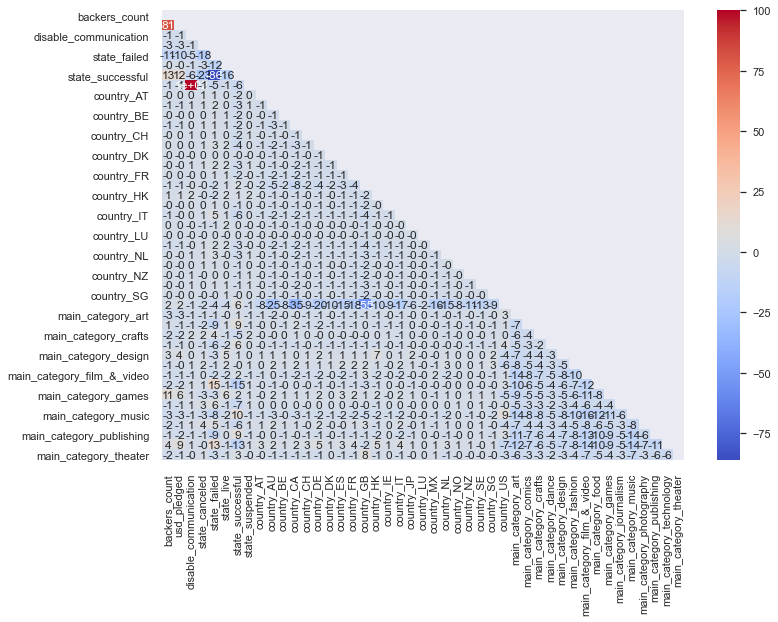

In [41]:
# Creating Heatmap for correlation coefficients of all variables
X_dum=pd.get_dummies(df_reduced.copy())
mask = np.triu(X_dum.corr())
ax = sns.heatmap(round(X_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')


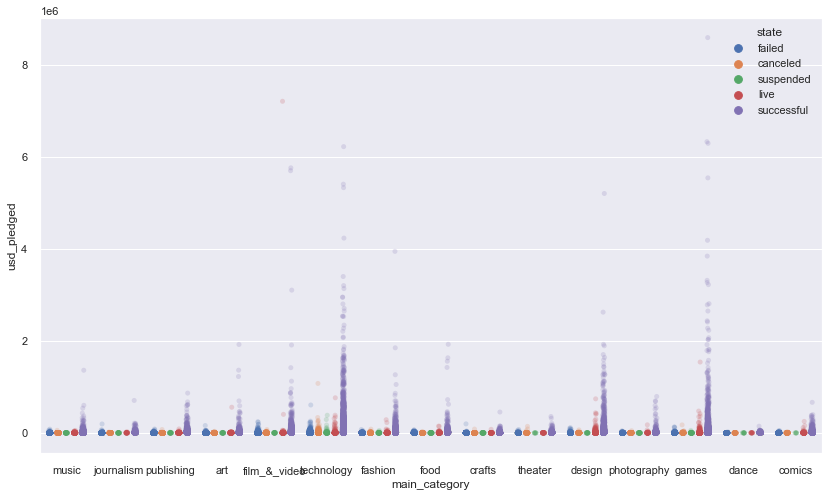

In [45]:
plt.figure(figsize=(14,8))
sns.stripplot(data=df_reduced,jitter=True,alpha=.2,
             x="main_category",
             y="usd_pledged",hue='state',size=5, dodge=True);

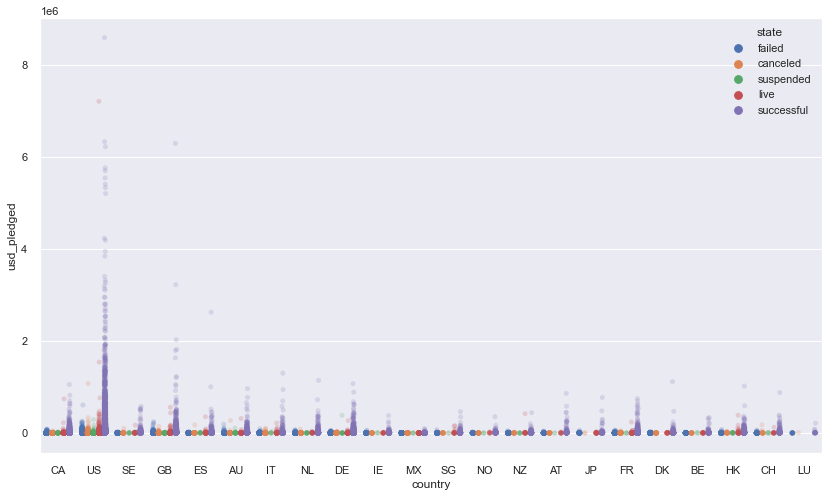

In [48]:
plt.figure(figsize=(14,8))
sns.stripplot(data=df_reduced,jitter=True,alpha=.2,
             x="country",
             y="usd_pledged",hue='state',size=5, dodge=True);

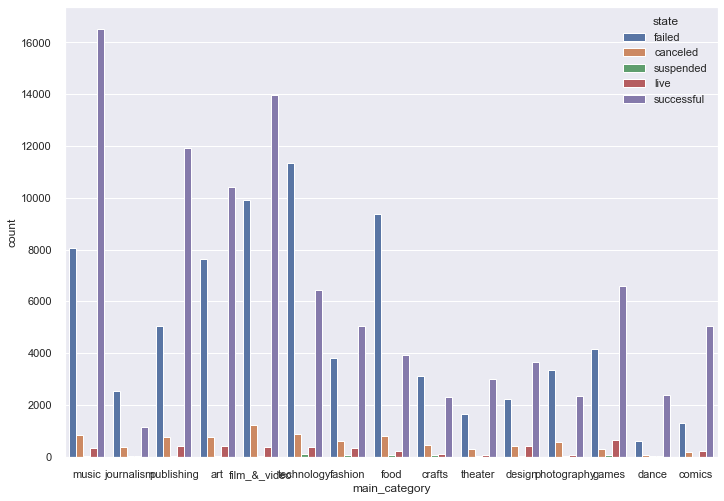

In [49]:
sns.countplot(x = "main_category", hue = "state", data = df_reduced);

In [52]:
print(df_reduced.groupby("main_category")["state"].value_counts())

main_category  state     
art            successful    10418
               failed         7643
               canceled        765
               live            408
               suspended        32
                             ...  
theater        successful     3019
               failed         1667
               canceled        291
               live             50
               suspended        10
Name: state, Length: 75, dtype: int64


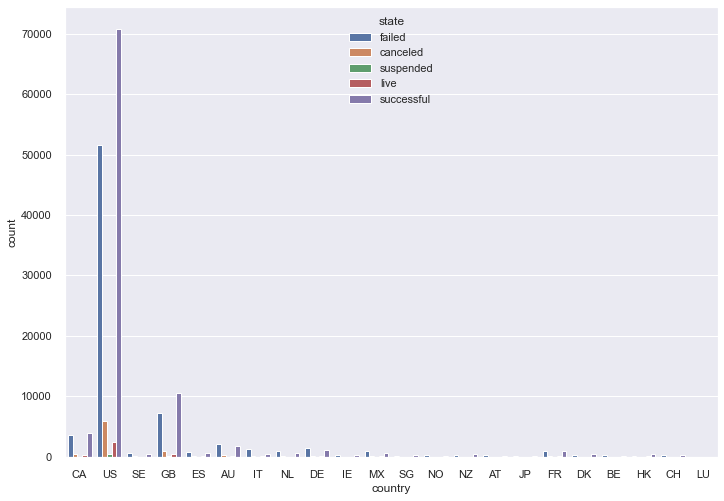

In [55]:
sns.countplot(x = "country", hue = "state", data = df_reduced);

In [56]:
df_reduced.groupby("main_category").median()

,backers_count,usd_pledged,disable_communication
main_category,,,
art,17,732.000000,False
comics,70,2596.285053,False
crafts,5,178.000000,False
dance,35,2544.000000,False
design,35,1995.535749,False
fashion,22,1072.710000,False
film_&_video,22,1580.583784,False
food,5,233.500000,False
games,54,2400.710000,False


In [57]:
df_reduced.groupby("state").median()

,backers_count,usd_pledged,disable_communication
state,,,
canceled,1,26.000000,False
failed,3,56.391276,False
live,15,696.000000,False
successful,68,4835.000000,False
suspended,1,8.000000,True


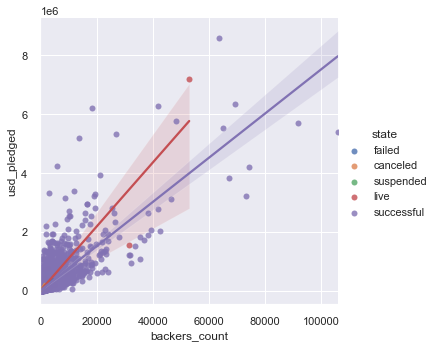

In [58]:
sns.lmplot(x = "backers_count", y = "usd_pledged", hue = "state", data = df_reduced);

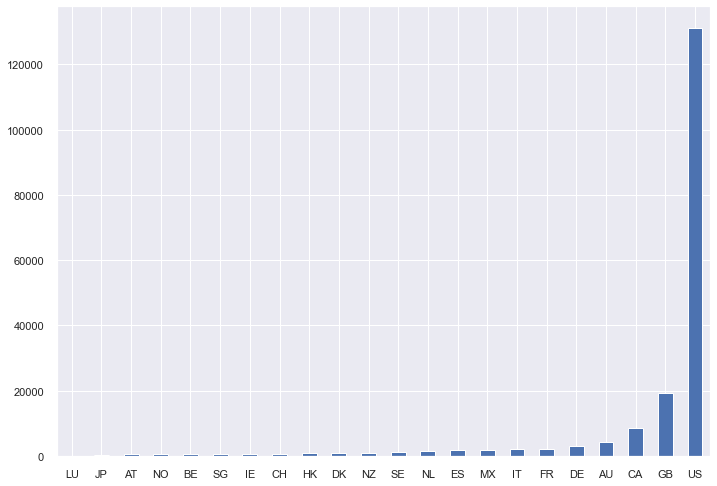

In [63]:

df_reduced['country'].value_counts(ascending=True).plot(kind='bar', rot=0);


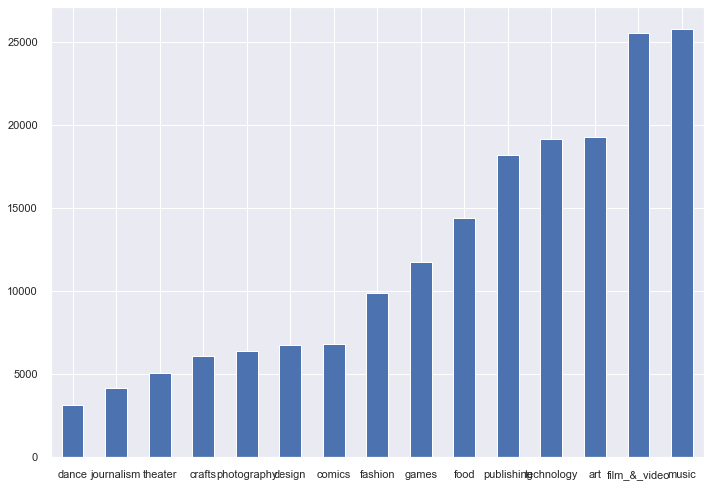

In [64]:
df_reduced['main_category'].value_counts(ascending=True).plot(kind='bar', rot=0);

## 05 - Feature Engineering

In [41]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182264 entries, 104610 to 168630
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   state                  182264 non-null  object
 1   backers_count          182264 non-null  int64 
 2   usd_pledged            182264 non-null  int64 
 3   country                182264 non-null  object
 4   disable_communication  182264 non-null  bool  
 5   main_category          182264 non-null  object
dtypes: bool(1), int64(2), object(3)
memory usage: 13.5+ MB


### Creating new Feature: campaign_days
The new feature campaign days will contain the information about how many days the campaign lasted.

In [72]:
# creating campaign_days for how long the fund raising was active
df_raw.launched_at = pd.to_datetime(df_raw.launched_at, unit='s')
df_raw.deadline = pd.to_datetime(df_raw.deadline, unit='s')
df_reduced["campaign_days"] = (round((df_raw.deadline - df_raw.launched_at)/ np.timedelta64(1, 'D'))).astype(int)

### Checking Feature disable_communication

In [43]:
# Checking for correlation between disable_communication and success
print(df_reduced.groupby("disable_communication").mean())
print(df_reduced['disable_communication'].value_counts())

                       backers_count   usd_pledged  campaign_days
disable_communication                                            
False                     133.567581  11571.384698      32.899957
True                       28.797753   3721.634029      34.951846
False    181641
True        623
Name: disable_communication, dtype: int64


The feature disable_communication doesn't provide enough information in order to contribute to the model. So it's going to be removed.

In [73]:
# There is a correlation, but there are not really enough entries to be used
df_reduced.drop(columns = ["disable_communication"], inplace = True)

### Creating new Feature goal_converted
The existing feature goal_reached provides the information about the amount of money, that is necessary to be successful, but in the local currenciy. The new feature goal_converted will provide all these amounts, but counted in USD. So we can use the feature as the values are compareable. 

In [74]:
# Calculate "goal_converted" based on "goal" multiplied with "static_usd_rate"
df_reduced["goal_converted"] = df_raw["goal"] * df_raw["static_usd_rate"]
df_reduced["goal_converted"] = df_reduced["goal_converted"].astype(int)

### Reduce Feature state to two values
The feature state has several unique values, but we are only interested in, wether a campaign was successful or not. So we'll use only two unique values to differentiate between these states. We are also only interested in past campaigns, so all the campaigns that have state 'live' will also be removed from our dataset.

In [75]:
df_reduced = df_reduced[(df_reduced['state']!="live")]
df_reduced["state"].replace("successful", value = 1, inplace = True)
df_reduced["state"].replace(["failed","canceled","suspended"], value = 0, inplace = True)

### Creating Dummie Features

In [47]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178225 entries, 104610 to 168630
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   state           178225 non-null  int64 
 1   backers_count   178225 non-null  int64 
 2   usd_pledged     178225 non-null  int64 
 3   country         178225 non-null  object
 4   main_category   178225 non-null  object
 5   campaign_days   178225 non-null  int64 
 6   goal_converted  178225 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 10.9+ MB


In [76]:
df_reduced = pd.get_dummies(df_reduced, drop_first = True)

In [77]:
df_reduced.head()

,state,backers_count,usd_pledged,campaign_days,goal_converted,country_AU,country_BE,country_CA,country_CH,country_DE,...,main_category_fashion,main_category_film_&_video,main_category_food,main_category_games,main_category_journalism,main_category_music,main_category_photography,main_category_publishing,main_category_technology,main_category_theater
104610,0,0,0,60,3699,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
160965,0,0,0,51,5000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
160980,0,0,0,30,4118,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43747,0,0,0,30,25000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
43741,0,0,0,30,500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Distribution of Features

We will explore the distributions of our remaining features and if a skew makes it necessary, we will transform them to resemble a normal distribution with the logarithmic function.

#### Distribution of usd_pledged

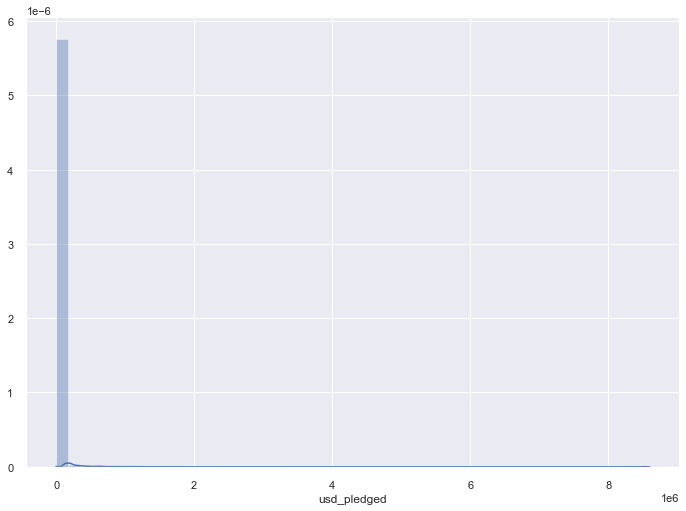

In [50]:
sns.distplot(df_reduced['usd_pledged']);

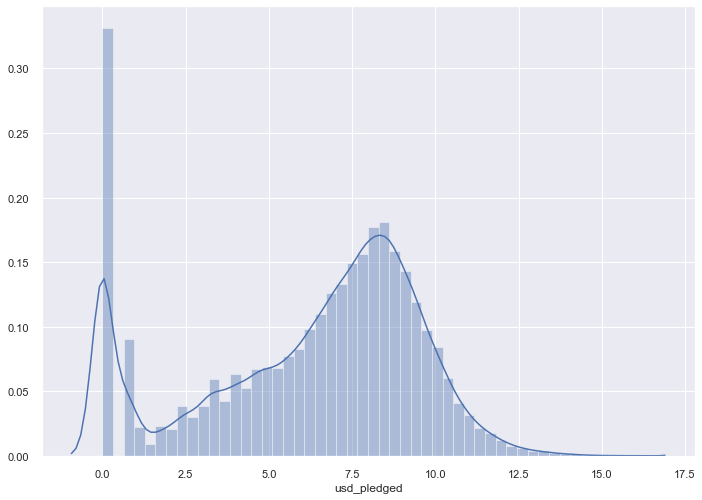

In [51]:
sns.distplot(np.log(df_reduced['usd_pledged']+1));

There seem to be a lot of unserious projects with little to no money pledged. Therefore only projects with an amount of at least 500 USD will be considered. The rest is dropped.

In [78]:
# Reduce dataset to only include "serious" projects, which is defined by a threshold of at least 500 USD pledged
df_reduced = df_reduced[df_reduced.usd_pledged >= 500]

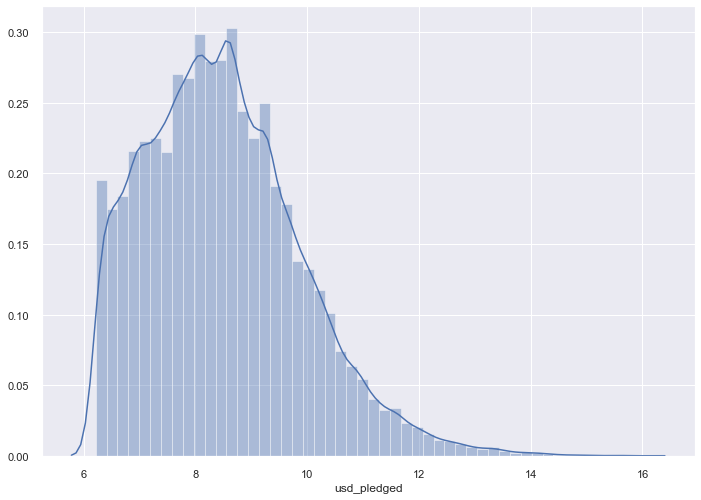

In [53]:
sns.distplot(np.log(df_reduced['usd_pledged']+1));

In [79]:
df_reduced.shape

(108700, 40)

#### Distribution of campaign days

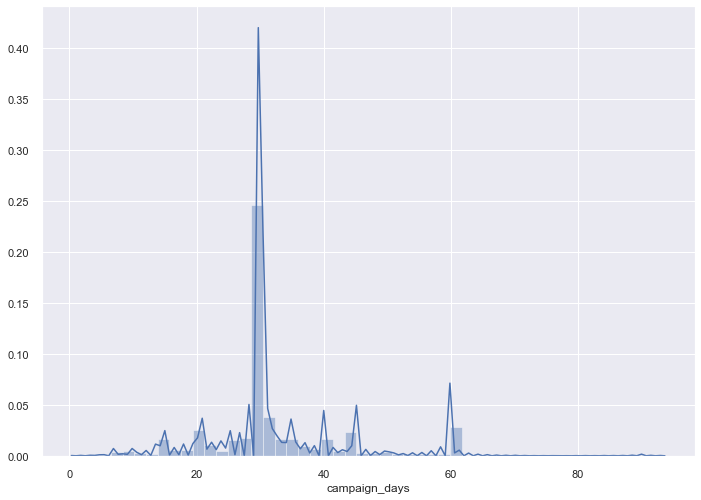

In [56]:
sns.distplot(df_reduced['campaign_days']);

#### Distribution of goal_converted

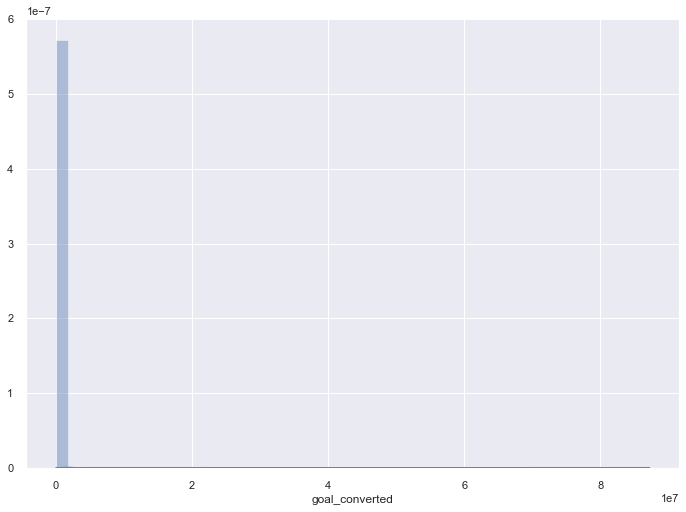

In [57]:
sns.distplot(df_reduced['goal_converted']);

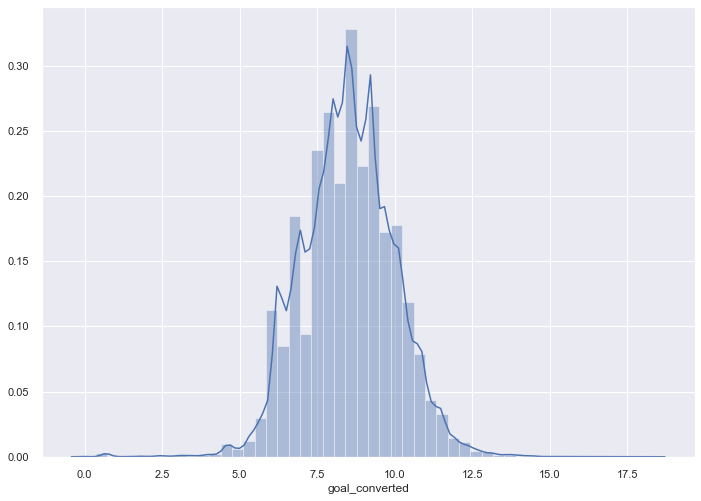

In [58]:
sns.distplot(np.log(df_reduced['goal_converted']+1));

In [80]:
df_reduced["goal_converted"] = np.log(df_reduced["goal_converted"]+1)

### Creating new Feature avg_usd_pledged

We create the feature avg_usd_pledged and drop backers_count and usd_pledged to prevent data leakage.  

We need to do this, because the ratio between usd_pledged and goal_converted is equivalent to our label.  
The same would be true for the ratio of (the product of avg_usd_pledged and backers_count) and goal_converted.  

In [81]:
# Creating new feature avg_usd_pledged
df_reduced["avg_usd_pledged"] = df_raw["usd_pledged"] / df_raw["backers_count"]
df_reduced.drop(columns = ["usd_pledged"], inplace = True)
df_reduced.drop(columns = ["backers_count"], inplace = True)

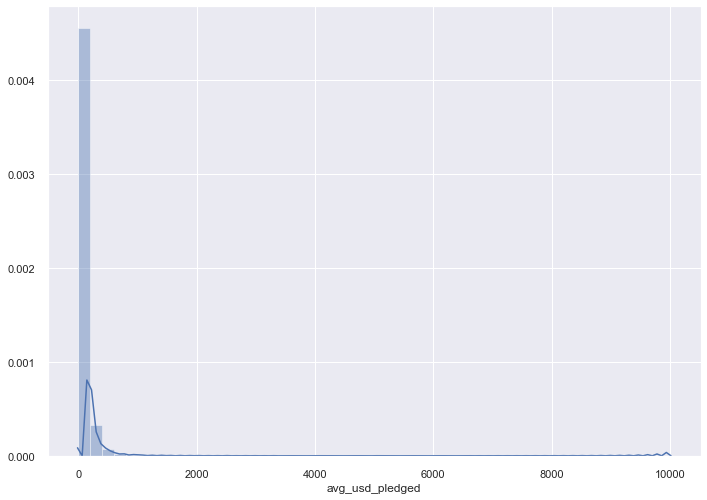

In [82]:
sns.distplot(df_reduced['avg_usd_pledged']);

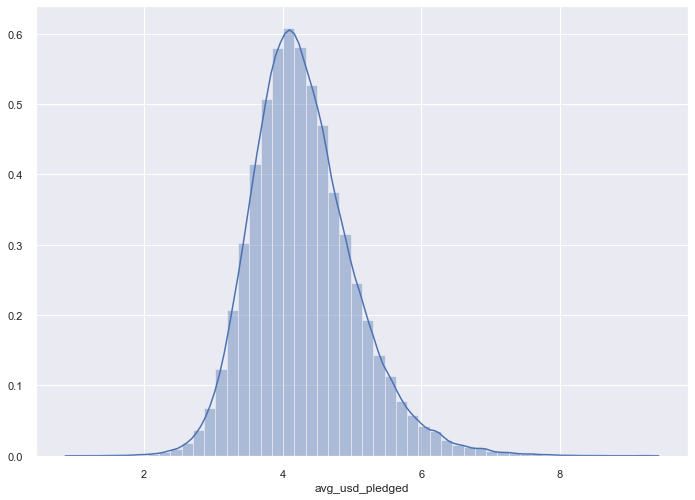

In [83]:
sns.distplot(np.log(df_reduced['avg_usd_pledged']+1));

In [84]:
df_reduced["avg_usd_pledged"] = np.log(df_reduced["avg_usd_pledged"]+1)

## 06 - Predictive Modelling

Now we will test different machine learning algorithms on the cleaned dataset and evaluate there performances based mainly on the True Positive Rate (precision).

In [3]:
# Function to show ROC Curve for the classifiers in comparison to the baseline predictor
def evaluate_model(predictions, probs, train_predictions, train_probs,train_labels, test_labels):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

### Preprocessing

In [5]:
# Separating features from labels
X = df_reduced.iloc[:,1::]
y = df_reduced.iloc[:,0]

#### Train-Test-Split

In [6]:
# Train-Test-Split keeping the same distribution of our label data in both splits
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = RSEED, shuffle = True, stratify = y)


#### Feature Scaling

In [7]:
# Scaling the features with a MinMaxScaler
min_max_scaler = MinMaxScaler()
y_train = y_train.to_frame().reset_index()
y_train.drop(columns = ["index"], inplace = True)
y_train = y_train["state"]
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

#### Upsampling Training Data

We decided not to upsample, but to assign balanced class weights in the tested machine learning models to counter the imbalance in our label (1: 82% and 0: 18%).

In [ ]:
## Indicies of each class' observations
#i_class0 = np.where(y_train == 0)[0]
#i_class1 = np.where(y_train == 1)[0]
#
## Number of observations in each class
#n_class0 = len(i_class0)
#n_class1 = len(i_class1)
#
## For every observation of class 1, randomly sample from class 0 with replacement
#i_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)
#y_train = np.hstack((y_train[i_class0_upsampled], y_train[i_class1]))
#X_train = np.concatenate((X_train[i_class0_upsampled], X_train[i_class1]),axis = 0)

### Random Forest Classifier

#### First try with basic parameters

In [8]:
# Create the model with 100 trees
RF_clf = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               class_weight = 'balanced',
                               n_jobs=-1, verbose = 1)

# Fit on training data
RF_clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished


RandomForestClassifier(class_weight='balanced', max_features='sqrt', n_jobs=-1,
                       random_state=42, verbose=1)

In [9]:
# Calculating the predictions and probabilities for the training and test set
train_rf_predictions = RF_clf.predict(X_train)
train_rf_probs = RF_clf.predict_proba(X_train)[:, 1]

rf_predictions = RF_clf.predict(X_test)
rf_probs = RF_clf.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


Recall Baseline: 1.0 Test: 0.93 Train: 1.0
Precision Baseline: 0.82 Test: 0.86 Train: 1.0
Roc Baseline: 0.5 Test: 0.78 Train: 1.0


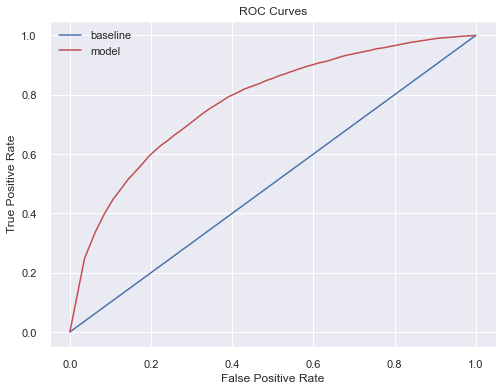

In [10]:
# Visualizing the results (ROC, Recall and Precision for the Baseline Predictor and our Predictor)
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs,y_train, y_test)

In [11]:
# Printing the Confusion Matrix
confusion_matrix_RF = confusion_matrix(y_test, rf_predictions)
confusion_matrix_RF

array([[ 1326,  2634],
       [ 1299, 16482]])

In [12]:
# Printing the F1-Score
print(f1_score(y_test, rf_predictions))

0.8934059679648753


In [13]:
# Printing the Classification Report
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.51      0.33      0.40      3960
           1       0.86      0.93      0.89     17781

    accuracy                           0.82     21741
   macro avg       0.68      0.63      0.65     21741
weighted avg       0.80      0.82      0.80     21741



The True Positive Rate (precision) of our model is 4 percentage points higher than the naive predictor (always predicting a successful project):  
**86% > 82%**  

#### Hyperparameter Tuning 

##### Tuned Model 1

We will try to tune the hyperparameters of our RandomForestClassifier by searching a predefined parameter grid trying to optimize the F-Beta-Score (**Beta = 0.5**, which puts more emphasis on precision rather than recall).

In [14]:
# Creating our own scoring function (F-Beta with beta of 0.5)
own_scorer = make_scorer(fbeta_score, beta=0.5)

# Hyperparameter grid
param_grid_RF = {
    'n_estimators': [50,125,200],
    'max_depth': [1,25, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5],
    'bootstrap': [True, False]
}

# Estimator for use in grid search
RF_estimator = RandomForestClassifier(random_state = RSEED, class_weight = 'balanced')

# Creating the grid search model
gs_RF = GridSearchCV(RF_estimator, param_grid_RF, n_jobs = -1, 
                        scoring = own_scorer, cv = 5, 
                        verbose = 1)

# Fit 
gs_RF.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 11.7min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [1, 25, None],
                         'max_features': ['sqrt'], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 125, 200]},
             scoring=make_scorer(fbeta_score, beta=0.5), verbose=1)

In [15]:
# Printing the best parameter combination from the predefined grid
print(gs_RF.best_params_)

{'bootstrap': True, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}


In [16]:
# Calculating the predictions and probabilities for the training and test set
train_rf_predictions = gs_RF.predict(X_train)
train_rf_probs = gs_RF.predict_proba(X_train)[:, 1]

rf_predictions = gs_RF.predict(X_test)
rf_probs = gs_RF.predict_proba(X_test)[:, 1]

Recall Baseline: 1.0 Test: 0.85 Train: 0.91
Precision Baseline: 0.82 Test: 0.89 Train: 0.97
Roc Baseline: 0.5 Test: 0.81 Train: 0.97


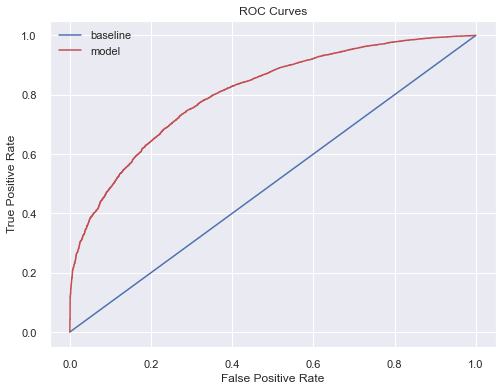

In [17]:
# Visualizing the results (ROC, Recall and Precision for the Baseline Predictor and our Predictor)
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs,y_train, y_test)

In [18]:
# Printing the Confusion Matrix
confusion_matrix_RF = confusion_matrix(y_test, rf_predictions)
confusion_matrix_RF

array([[ 2171,  1789],
       [ 2587, 15194]])

In [19]:
# Printing the F1-Score
print(f1_score(y_test, rf_predictions))

0.8741226556207571


In [20]:
# Printing the Classification Report
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.46      0.55      0.50      3960
           1       0.89      0.85      0.87     17781

    accuracy                           0.80     21741
   macro avg       0.68      0.70      0.69     21741
weighted avg       0.81      0.80      0.81     21741



The True Positive Rate (precision) of our model is now 7 percentage points higher than the naive predictor (always predicting a successful project):  
**89% > 82%**  

The F1-Score dropped from **89.34% to 87.41%** due to the worse recall (**93% to 85%**).

##### Tuned Model 2

Based on the results of tuned model 1 a new parameter grid will be tested to try to further imporve the True Positive Rate (Precision) of our model.

In [21]:
# Creating our own scoring function (F-Beta with beta of 0.2)
own_scorer = make_scorer(fbeta_score, beta=0.5)

# Hyperparameter grid
param_grid_RF = {
    'n_estimators': [200, 250],
    'max_depth': [25, 50, None],
    'max_features': ['sqrt'],
    'min_samples_split': [5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in grid search
RF_estimator = RandomForestClassifier(random_state = RSEED, class_weight = 'balanced')

# Creating the grid search model
gs_RF = GridSearchCV(RF_estimator, param_grid_RF, n_jobs = -1, 
                        scoring = own_scorer, cv = 5, 
                        verbose = 1)

# Fit 
gs_RF.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 19.6min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [25, 50, None], 'max_features': ['sqrt'],
                         'min_samples_split': [5, 10],
                         'n_estimators': [200, 250]},
             scoring=make_scorer(fbeta_score, beta=0.5), verbose=1)

In [22]:
# Printing the best parameter combination from the predefined grid
print(gs_RF.best_params_)

{'bootstrap': True, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 250}


In [23]:
# Calculating the predictions and probabilities for the training and test set
train_rf_predictions = gs_RF.predict(X_train)
train_rf_probs = gs_RF.predict_proba(X_train)[:, 1]

rf_predictions = gs_RF.predict(X_test)
rf_probs = gs_RF.predict_proba(X_test)[:, 1]

Recall Baseline: 1.0 Test: 0.83 Train: 0.88
Precision Baseline: 0.82 Test: 0.9 Train: 0.96
Roc Baseline: 0.5 Test: 0.81 Train: 0.95


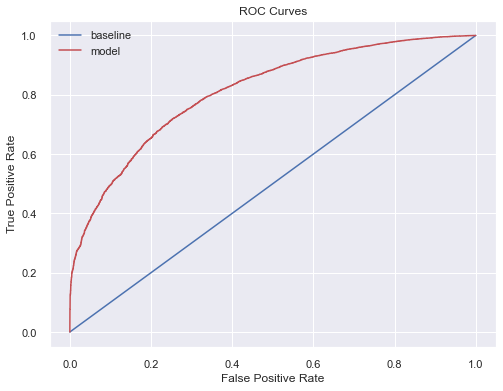

In [24]:
# Visualizing the results (ROC, Recall and Precision for the Baseline Predictor and our Predictor)
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs,y_train, y_test)

In [25]:
# Printing the Confusion Matrix
confusion_matrix_RF = confusion_matrix(y_test, rf_predictions)
confusion_matrix_RF

array([[ 2391,  1569],
       [ 3031, 14750]])

In [26]:
# Printing the F1-Score
print(f1_score(y_test, rf_predictions))

0.8651026392961877


In [27]:
# Printing the Classification Report
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.44      0.60      0.51      3960
           1       0.90      0.83      0.87     17781

    accuracy                           0.79     21741
   macro avg       0.67      0.72      0.69     21741
weighted avg       0.82      0.79      0.80     21741



The True Positive Rate (precision) of our model is now 8 percentage points higher than the naive predictor (always predicting a successful project):  
**90% > 82%**  

The F1-Score dropped further from **89.34% to 87.41% to 86.51%** due to the worse recall (**93% to 85% to 83%**).

##### Tuned Model 3

Based on the results of tuned model 1 and 2 a new parameter grid will be tested to try to further imporve the True Positive Rate (Precision) of our model.

In [74]:
# Creating our own scoring function (F-Beta with beta of 0.2)
own_scorer = make_scorer(fbeta_score, beta=0.5)

# Hyperparameter grid
param_grid_RF = {
    'n_estimators': [200, 250],
    'max_depth': [10, 25, None],
    'max_features': ['sqrt'],
    'min_samples_split': [5, 10, 15],
    'bootstrap': [True, False]
}

# Estimator for use in grid search
RF_estimator = RandomForestClassifier(random_state = RSEED, class_weight = 'balanced')

# Creating the grid search model
gs_RF = GridSearchCV(RF_estimator, param_grid_RF, n_jobs = -1, 
                        scoring = own_scorer, cv = 5, 
                        verbose = 1)

# Fit 
gs_RF.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 25.3min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 25, None], 'max_features': ['sqrt'],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [200, 250]},
             scoring=make_scorer(fbeta_score, beta=0.5), verbose=1)

In [75]:
# Printing the best parameter combination from the predefined grid
print(gs_RF.best_params_)

{'bootstrap': True, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_split': 15, 'n_estimators': 200}


In [76]:
# Calculating the predictions and probabilities for the training and test set
train_rf_predictions = gs_RF.predict(X_train)
train_rf_probs = gs_RF.predict_proba(X_train)[:, 1]

rf_predictions = gs_RF.predict(X_test)
rf_probs = gs_RF.predict_proba(X_test)[:, 1]

Recall Baseline: 1.0 Test: 0.81 Train: 0.86
Precision Baseline: 0.82 Test: 0.91 Train: 0.96
Roc Baseline: 0.5 Test: 0.81 Train: 0.93


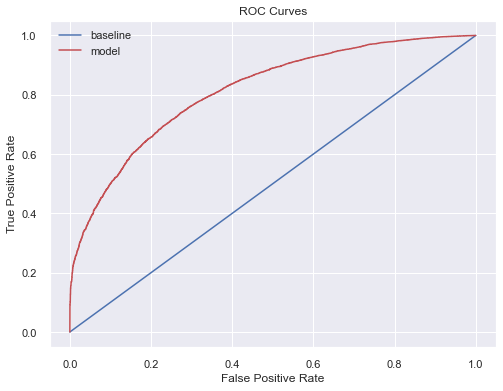

In [77]:
# Visualizing the results (ROC, Recall and Precision for the Baseline Predictor and our Predictor)
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs,y_train, y_test)

In [78]:
# Printing the Confusion Matrix
confusion_matrix_RF = confusion_matrix(y_test, rf_predictions)
confusion_matrix_RF

array([[ 2489,  1471],
       [ 3290, 14491]])

In [79]:
# Printing the F1-Score
print(f1_score(y_test, rf_predictions))

0.8589040689920874


In [80]:
# Printing the Classification Report
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.43      0.63      0.51      3960
           1       0.91      0.81      0.86     17781

    accuracy                           0.78     21741
   macro avg       0.67      0.72      0.69     21741
weighted avg       0.82      0.78      0.80     21741



The True Positive Rate (precision) of our model is now 9 percentage points higher than the naive predictor (always predicting a successful project):  
**91% > 82%**  

The F1-Score dropped further from **89.34% to 87.41% to 86.51% to 85.89%** due to the worse recall (**93% to 85% to 83% to 81%**).

##### Tuned Model 4

Based on the results of tuned model 1, 2 and 3 a new parameter grid will be tested to try to further imporve the True Positive Rate (Precision) of our model.

In [81]:
# Creating our own scoring function (F-Beta with beta of 0.5)
own_scorer = make_scorer(fbeta_score, beta=0.5)

# Hyperparameter grid
param_grid_RF = {
    'n_estimators': [200, 250],
    'max_depth': [25, None],
    'max_features': ['sqrt'],
    'min_samples_split': [15, 20],
    'bootstrap': [True]
}

# Estimator for use in grid search
RF_estimator = RandomForestClassifier(random_state = RSEED, class_weight = 'balanced')

# Creating the grid search model
gs_RF = GridSearchCV(RF_estimator, param_grid_RF, n_jobs = -1, 
                        scoring = own_scorer, cv = 5, 
                        verbose = 1)

# Fit 
gs_RF.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.2min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [25, None],
                         'max_features': ['sqrt'],
                         'min_samples_split': [15, 20],
                         'n_estimators': [200, 250]},
             scoring=make_scorer(fbeta_score, beta=0.5), verbose=1)

In [82]:
# Printing the best parameter combination from the predefined grid
print(gs_RF.best_params_)

{'bootstrap': True, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_split': 20, 'n_estimators': 250}


In [83]:
# Calculating the predictions and probabilities for the training and test set
train_rf_predictions = gs_RF.predict(X_train)
train_rf_probs = gs_RF.predict_proba(X_train)[:, 1]

rf_predictions = gs_RF.predict(X_test)
rf_probs = gs_RF.predict_proba(X_test)[:, 1]

Recall Baseline: 1.0 Test: 0.8 Train: 0.84
Precision Baseline: 0.82 Test: 0.91 Train: 0.95
Roc Baseline: 0.5 Test: 0.82 Train: 0.92


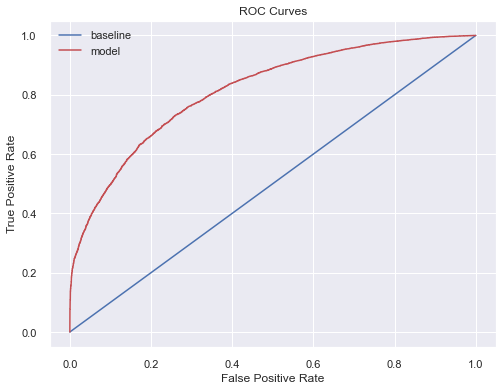

In [84]:
# Visualizing the results (ROC, Recall and Precision for the Baseline Predictor and our Predictor)
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs,y_train, y_test)

In [85]:
# Printing the Confusion Matrix
confusion_matrix_RF = confusion_matrix(y_test, rf_predictions)
confusion_matrix_RF

array([[ 2565,  1395],
       [ 3480, 14301]])

In [86]:
# Printing the F1-Score
print(f1_score(y_test, rf_predictions))

0.8543776324043373


In [87]:
# Printing the Classification Report
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.42      0.65      0.51      3960
           1       0.91      0.80      0.85     17781

    accuracy                           0.78     21741
   macro avg       0.67      0.73      0.68     21741
weighted avg       0.82      0.78      0.79     21741



The True Positive Rate (precision) of our model did not get any better. It is still 9 percentage points higher than the naive predictor (always predicting a successful project):  
**91% > 82%**  

The F1-Score dropped further from **89.34% to 87.41% to 86.51% to 85.89% to 85.44%** due to the worse recall (**93% to 85% to 83% to 81% to 80%**).

### Logistic Regression

#### First try with basic parameters

In [41]:
# Initializing and training the Classifier
log_reg = LogisticRegression(random_state = RSEED, class_weight = 'balanced', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [42]:
# Calculating the predictions and probabilities for the training and test set
train_log_reg_predictions = log_reg.predict(X_train)
train_log_reg_probs = log_reg.predict_proba(X_train)[:, 1]

log_reg_predictions = log_reg.predict(X_test)
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]

Recall Baseline: 1.0 Test: 0.73 Train: 0.74
Precision Baseline: 0.82 Test: 0.92 Train: 0.92
Roc Baseline: 0.5 Test: 0.81 Train: 0.8


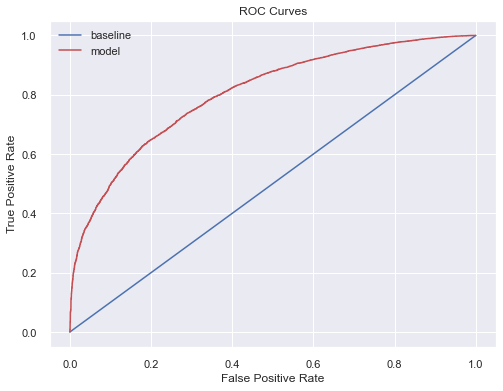

In [43]:
# Visualizing the results (ROC, Recall and Precision for the Baseline Predictor and our Predictor)
evaluate_model(log_reg_predictions, log_reg_probs, train_log_reg_predictions, train_log_reg_probs,y_train, y_test)

In [44]:
# Printing the Confusion Matrix
confusion_matrix_log_reg = confusion_matrix(y_test, log_reg_predictions)
confusion_matrix_log_reg

array([[ 2831,  1129],
       [ 4754, 13027]])

In [45]:
# Printing the F1-score
print(f1_score(y_test, log_reg_predictions))

0.8157935936374737


In [46]:
# Printing the Classification Report
print(classification_report(y_test, log_reg_predictions))

              precision    recall  f1-score   support

           0       0.37      0.71      0.49      3960
           1       0.92      0.73      0.82     17781

    accuracy                           0.73     21741
   macro avg       0.65      0.72      0.65     21741
weighted avg       0.82      0.73      0.76     21741



The True Positive Rate (precision) of our basic Logistic Regression Model is 10 percentage points higher than the naive predictor (always predicting a successful project):  
**92% > 82%**  
This is also a little better than the Random Forest Model (91%)

The F1-Score with **81.58%** is significantly lower thant that of the Random Forest Model (caused by bad recall **73%**).

#### Hyperparameter Tuning

##### Tuned Model 1

As seen before we will try to tune the parameters of our Logistic Regression Model to maximize the F-Beta-Score (Beta = 0.5).

In [67]:
# Creating our own scoring function (F-Beta with beta of 0.5)
own_scorer = make_scorer(fbeta_score, beta=0.5)

# Hyperparameter grid
param_grid_LR = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.05, 0.08, 0.1, 0.2, 0.5, 1]
}

# Estimator for use in grid search
LR_estimator = LogisticRegression(random_state = RSEED, class_weight = 'balanced', max_iter=1000)

# Creating the grid search model
gs_LR = GridSearchCV(LR_estimator, param_grid_LR, n_jobs = -1, 
                        scoring = own_scorer, cv = 5, 
                        verbose = 1)

# Fit 
gs_LR.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.0s finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.05, 0.08, 0.1, 0.2, 0.5, 1],
                         'penalty': ['l1', 'l2']},
             scoring=make_scorer(fbeta_score, beta=0.5), verbose=1)

In [68]:
# Printing the best parameter combination from the predefined grid
print(gs_LR.best_params_)

{'C': 0.1, 'penalty': 'l2'}


In [69]:
# Calculating the predictions and probabilities for the training and test set
train_log_reg_predictions = log_reg.predict(X_train)
train_log_reg_probs = log_reg.predict_proba(X_train)[:, 1]

log_reg_predictions = log_reg.predict(X_test)
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]

Recall Baseline: 1.0 Test: 0.73 Train: 0.74
Precision Baseline: 0.82 Test: 0.92 Train: 0.92
Roc Baseline: 0.5 Test: 0.81 Train: 0.8


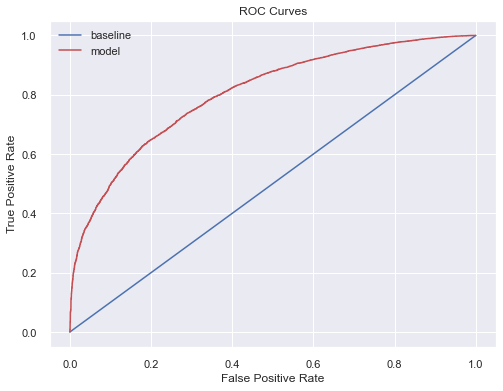

In [70]:
# Visualizing the results (ROC, Recall and Precision for the Baseline Predictor and our Predictor)
evaluate_model(log_reg_predictions, log_reg_probs, train_log_reg_predictions, train_log_reg_probs,y_train, y_test)

In [71]:
# Printing the Confusion Matrix
confusion_matrix_log_reg = confusion_matrix(y_test, log_reg_predictions)
confusion_matrix_log_reg

array([[ 2831,  1129],
       [ 4754, 13027]])

In [72]:
# Printing the F1-score
print(f1_score(y_test, log_reg_predictions))

0.8157935936374737


In [73]:
# Printing the Classification Report
print(classification_report(y_test, log_reg_predictions))

              precision    recall  f1-score   support

           0       0.37      0.71      0.49      3960
           1       0.92      0.73      0.82     17781

    accuracy                           0.73     21741
   macro avg       0.65      0.72      0.65     21741
weighted avg       0.82      0.73      0.76     21741



The different parameters do not seem to have any influence at all on the quality of our classifier. This why we will not further investigate other parameter combinations.

### SVC

#### First try with basic parameters

In [93]:
# Initializing and training the classifier
SV_clf = SVC(random_state = RSEED, class_weight = 'balanced')
SV_clf.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [94]:
# Calculating the predictions for the training and test set
train_SV_predictions = SV_clf.predict(X_train)
SV_predictions = SV_clf.predict(X_test)

In [95]:
# Printing the Confusion Matrix
confusion_matrix_SV = confusion_matrix(y_test, SV_predictions)
confusion_matrix_SV

array([[ 2918,  1042],
       [ 5066, 12715]])

In [96]:
# Printing the F1-Score
print(f1_score(y_test, SV_predictions))

0.8063288731054601


In [97]:
# Printing the Classification Report
print(classification_report(y_test, SV_predictions))

              precision    recall  f1-score   support

           0       0.37      0.74      0.49      3960
           1       0.92      0.72      0.81     17781

    accuracy                           0.72     21741
   macro avg       0.64      0.73      0.65     21741
weighted avg       0.82      0.72      0.75     21741



The True Positive Rate (precision) of our basic Support Vector Model is 10 percentage points higher than the naive predictor (always predicting a successful project):  
**92% > 82%**  
This is also a little better than the Random Forest Model (91%) and the same as the Logistic Regression Model (92%).

The F1-Score with **80.63%** is significantly lower than that of the Random Forest Model (caused by bad recall **72%**) and a little worse than that of the Logistic Regression Model (F1-Score: 81.58%, Recall: 73%).

#### Hyperparameter Tuning

##### Tuned Model 1

As seen before we will try to tune the parameters of our Support Vector Model to maximize the F-Beta-Score (Beta = 0.5).

In [99]:
# Creating our own scoring function (F-Beta with beta of 0.5)
own_scorer = make_scorer(fbeta_score, beta=0.5)

# Hyperparameter grid
param_grid_SVC = {
    'C' : [1, 10, 50],
    'gamma' : [0.01, 0.1, 0.5, 1],
    'kernel': ["rbf"]
}

# Estimator for use in grid search
SVC_estimator = SVC(random_state = RSEED, class_weight = 'balanced')

# Creating the grid search model
gs_SVC = GridSearchCV(SVC_estimator, param_grid_SVC, n_jobs = -1, 
                        scoring = own_scorer, cv = 5, 
                        verbose = 1)

# Fit 
gs_SVC.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 135.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 182.3min finished


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=42),
             n_jobs=-1,
             param_grid={'C': [1, 10, 50], 'gamma': [0.01, 0.1, 0.5, 1],
                         'kernel': ['rbf']},
             scoring=make_scorer(fbeta_score, beta=0.5), verbose=1)

In [100]:
# Printing the best parameter combination from the predefined grid
print(gs_SVC.best_params_)

{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}


In [101]:
train_SV_predictions = SV_clf.predict(X_train)
SV_predictions = SV_clf.predict(X_test)

In [102]:
confusion_matrix_SV = confusion_matrix(y_test, SV_predictions)
confusion_matrix_SV

array([[ 2918,  1042],
       [ 5066, 12715]])

In [103]:
print(f1_score(y_test, SV_predictions))

0.8063288731054601


In [104]:
print(classification_report(y_test, SV_predictions))

              precision    recall  f1-score   support

           0       0.37      0.74      0.49      3960
           1       0.92      0.72      0.81     17781

    accuracy                           0.72     21741
   macro avg       0.64      0.73      0.65     21741
weighted avg       0.82      0.72      0.75     21741



The different parameters delivered in the prameter grid do not result in a change in our results.

## 07 - Results & Future Work

### Results

Based on our models values of more than 85% for our goal metric (TPR) can easily be achieved. Nevertheless, if we only try to optimize this metric, the recall and the overall accuracy of our models will be diminished, since the model will predict less successful outcomes overall, resulting in a higher number of false negative predictions. This needs to be taken into account when choosing the model for your prediction.  

Based on these thoughts the best model, that we could find so far is the tuned Random Forest Model 2 with a **precision** of **90%** and a **F1-Score** of **86.51%**.

### Future Work

In the future we would try to implement different ensemble models like AdaBoost, XGBoost or a StackingClassifier on the algorithms we used so far. Moreover, we would try to further improve the precision without compromising overall accuracy in our predictions. This could probably be done by implementing more features. Maybe it is possible to implement the success rate of the creator of the campaign at hand into the model.